# Practica Covid en Africa:


## Primer paso: cargar el modelo

### Carguemos la base de datos



In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import statsmodels.stats.api as sms
from wooldridge import *

In [2]:
import pandas as pd #librería para manejo de datos

data= pd.read_excel ('covid_africa.xlsx') 

data

,Total Deaths,Country,Total Cases,Total Recovered,Active Cases,Total Cases/1 mil population,Death/1 mil population,Total Tests,Tests/1 mil population,Population,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,5853,Algeria,204597,140238,58506,4561,130,230861,5147,44857594,NaN,NaN,NaN,NaN,NaN
1,1622,Angola,61378,49601,10155,1797,47,1043451,30543,34163081,NaN,NaN,NaN,NaN,NaN
2,159,Benin,24335,23257,919,1943,13,604310,48243,12526305,NaN,NaN,NaN,NaN,NaN
3,2376,Botswana,180438,176595,1467,74810,985,1770961,734241,2411963,NaN,NaN,NaN,NaN,NaN
4,195,Burkina Faso,14495,14028,272,670,9,219242,10136,21630767,NaN,NaN,NaN,NaN,NaN
5,38,Burundi,19041,773,18230,1543,3,345742,28018,12340090,NaN,NaN,NaN,NaN,NaN
6,346,Cabo Verde,37888,37070,472,67216,614,209870,372326,563672,NaN,NaN,NaN,NaN,NaN
7,1517,Cameroon,95399,80433,13449,3484,55,1751774,63969,27384891,NaN,NaN,NaN,NaN,NaN
8,100,CAR,11401,6859,4442,2310,20,60228,12200,4936522,NaN,NaN,NaN,NaN,NaN
9,174,Chad,5059,4865,20,297,10,147563,8668,17023967,NaN,NaN,NaN,NaN,NaN


### Vamos a ver los resultados de regresión

In [3]:
import statsmodels.api as sm
# Modelo Regresión:  modeldata=covid_africa.values 
#   "Total Cases",  "Total Tests", "Active Cases",
lista = data[[  "Total Recovered",    "Death/1 mil population", "Total Cases/1 mil population", "Tests/1 mil population", "Population"]]
X=lista
X = X.astype('float64')

# Y=data[["Total Deaths"]]

Y=data.values[:,0]
Y = Y.astype('float64')

results = sm.OLS(Y, sm.add_constant(X)).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     238.8
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.12e-32
Time:                        12:07:06   Log-Likelihood:                -497.85
No. Observations:                  54   AIC:                             1008.
Df Residuals:                      48   BIC:                             1020.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -38.7946    555.373     -0.070      0.945   -1155.447    1077.857
Total Recovered                  0.0294      0.001     25.382      0.000       0.027       0.032
Death/1 mil population           3.6834      1.471      2.503      0.016       0.725       6.642
Total Cases/1 mil population    -0.0198      0.016     -1.257      0.215      -0.052       0.012
Tests/1 mil population          -0.0069      0.003     -2.199      0.033      -0.013      -0.001
Population                   -2.972e-06   1.07e-05     -0.277      0.783   -2.45e-05    1.86e-05
==============================================================================
Omnibus:                       28.460   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              310.249
Skew:                          -0.670   Prob(JB):                     4.27e-68
Kurtosis:                      14.666   Cond. No.                     7.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Test linealidad


### Test de Harvey-Collier y Reset de Ramsey

In [4]:
import statsmodels.stats.outliers_influence as oi #Para el test RESET de Ramsey
import statsmodels.stats.diagnostic as diagn #Para el test de Harvey-Collier
mco1 = sm.OLS(Y, sm.add_constant(X)).fit()

#### Estos test nos permite saber si un modelo sigue una disposición lineal, a la hora de diagnosticar los valores de los residuos.

In [5]:
from scipy import stats
skip = len(mco1.params)  # bug in linear_harvey_collier
rr = sms.recursive_olsresiduals(mco1, skip=skip, alpha=0.95, order_by=None)
stats.ttest_1samp(rr[3][skip:], 0)

Ttest_1sampResult(statistic=0.06295879195233976, pvalue=0.950066315053199)

#### Como el valor de p es: 0.9500663150531990.950066315053199 al ser mayor > 0.05, aceptamos la hipotesis.

In [6]:
print("Test de RESET de Ramsey: ")
rr=oi.reset_ramsey(mco1, degree=2)
rr

Test de RESET de Ramsey: 


<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[27.93605752]]), p=3.184640934567803e-06, df_denom=47, df_num=1>

#### Como el valor de p es extremedamente pequeño no podemos aceptar la hipotesis ya que esta deberia ser mayor que 0.05.

## Test de Autocorrelación

### Test de Durbin Watson:

#### Si el valor es 0, existe una correlacion bastante fuerte (positivamente).
#### Si el valor es 4, existe una correlación bastante fuerte (negativamente)
#### Si esta cerca de 2, quiere decir que no existe correlación.

#### Miramos en la tabla de DW para comprobar su valor.

#### Como nuestro modelo tiene 5 variables--> k=5
#### dL = 1.374  y dU = 1.768
#### Como se presenta 1.768 < 1.9549 < 4-1.768

#### Por tanto presentamos unos residuos incorrelados.

In [7]:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(mco1.resid)

print("Durbin-Watson:", dw)

rho= 1 - dw/2 # ro estimado inicial
print ("Rho inicial: ", rho) # rho inicial

mco_autocorr=sm.GLSAR(Y, sm.add_constant(X), rho=rho)
res = mco_autocorr.iterative_fit(maxiter=1000, rtol = 10**(-10)) # iteraciones y tolerancia, la tolerancia es si entre un rho y otro hay muy poca diferencia paro (10^-10)

print ('Iterations used = %d Converged %s' % (res.iter, res.converged) )
print ('Rho = ', mco_autocorr.rho)

res.summary()

Durbin-Watson: 1.9549380214767726
Rho inicial:  0.022530989261613676
Iterations used = 12 Converged True
Rho =  [0.02530359]


<class 'statsmodels.iolib.summary.Summary'>
"""
                           GLSAR Regression Results                           
==============================================================================
Dep. Variable:                      y   R-squared:                       0.962
Model:                          GLSAR   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     236.6
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           4.22e-32
Time:                        12:07:06   Log-Likelihood:                -488.90
No. Observations:                  53   AIC:                             989.8
Df Residuals:                      47   BIC:                             1002.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -72.2297    567.355     -0.127      0.899   -1213.602    1069.142
Total Recovered                  0.0294      0.001     25.226      0.000       0.027       0.032
Death/1 mil population           3.6520      1.479      2.468      0.017       0.676       6.628
Total Cases/1 mil population    -0.0199      0.016     -1.257      0.215      -0.052       0.012
Tests/1 mil population          -0.0067      0.003     -2.090      0.042      -0.013      -0.000
Population                   -3.661e-06   1.08e-05     -0.338      0.736   -2.54e-05    1.81e-05
==============================================================================
Omnibus:                       28.324   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.830
Skew:                          -0.648   Prob(JB):                     2.15e-70
Kurtosis:                      14.983   Cond. No.                     7.01e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### En nuestro caso como nuestro valor es 2.049775773541431, pues podemos decir que no existe correlacion entre las variables.
#### Con esto comprobamos el numero de iteraciones necesarias para conseguir el rho principal con un cierto grado de tolerancia.

### Test de Ljung-Box

#### Con este test podemos probar si existe relacion en mi perturbación aleatoria con la de x años antes.
#### Los lags son los retardos, pudiendo poner cualquier numero de años.
#### Explicación: da el p valor, que es la siguiente lista, acepto las 3 hipotesis ya que todos los p valores son mas grande que la alfa (0.05)
#### No deberiamos tener problema de autorcorrelación

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox # analizamos con Ljung-Box si existen relaccion en mi pertubacion aleatoria con la de m años antes
mco2=sm.OLS(Y, sm.add_constant(X)).fit()
acorr_ljungbox(mco2.resid, lags=3, return_df=True) # lags son los retardos, comparo hasta con 3 años antes


,lb_stat,lb_pvalue
1,0.018465,0.891913
2,0.538936,0.763786
3,0.567103,0.903920


#### - En nuestro caso, como nuestros valores no son tan pequeño, podemos decir que no existe una relación muy fuerte.

## Tests de Heterocedasticidad

### En un modelo hay heterocedasticidad cuando la varianza de los errores no es igual en todas las observaciones realizadas. 

#### Por lo que buscamos comprobar así, si se cumple uno de los requisitos básicos de las hipótesis de los modelos lineales.

### Test de goldfelquandt

#### Este test es para muestras pequeñas
#### Test goldfelquandt , split es el numero de elementos que pone en cada trozo, si no pones nada divide en 2 por defecto.
#### Para dividir entre 3 las variables, para comparar los maximos y minimos.

In [9]:
import statsmodels.stats.api as sms

GQ = sms.het_goldfeldquandt(mco1.resid, mco1.model.exog) 

#Hipotesis nula homocedasticidad, no tengo un problema de heterocedasticidad
#Todo numero mayor que 0.05 rechazo entonces tengo heterocedasticidad

print (GQ)

(1.3942643987351242, 0.22637472263591138, 'increasing')


#### Como nuestro p-valor es: 0.337956702000184, al ser mayor que 0.05, podemos decir que nuestro modelo no tiene problemas de heterocedasticidad.

### Test de Breush-Pagan homocedasticidad 

#### Test para muestras mas grandes
#### Los dos ultimos valores me interesan , el estadistico experimental y P valor:
#### - (como este es mayor que 0.05 no tengo probelma de heterocedasticidad) tengo homocedasticidad porque nuestro valor es mas pequeño 0,05
#### - (alpha nivel de significacion a partir del cual empiezo a rechazar el modelo)

In [10]:
#BREUSH-PAGAN
BP = sms.het_breuschpagan(mco1.resid, mco1.model.exog)


print (BP)

(9.89058255830322, 0.07839557440419148, 2.1525923049247706, 0.07507412444391537)


#### Como este nuestro modelo sale con un valor de: 0.07507412444391537 > 0.05, por tanto aceptamos la hipotesis y decimos que tenemos problemas de heterocedasticidad.

### Test de White

#### Test para muestras mas grandes
#### El test de white es muy parecido, pero tiene en cuenta el producto de las variables
#### Si me da significacion global no tengo problema de heterocedasticidad

In [11]:
#WHITE
W=sms.het_white(mco1.resid, mco1.model.exog)
print (W) 

(53.08044701284705, 2.5495220968913715e-05, 112.24147139396045, 1.2709406897749438e-25)


#### Como este test se basa en muestras grandes, nuestro modelo no va a cumplir el requisito de ser > 0.05 y por tanto rechazamos la hipotesis.

### Test de Glejser

#### Vamos a comprobar todas estas variables y nos vamos a quedar con la que tenga el R2 mas grande, si este valor es mayor que 0.05:
#### Ese sera nuestro Z^2, el cual se puede corregir con minimos cuadrados ponderados, multiplicando mis datos por 1/sqrt(Z^2).

In [12]:
maximo=""
alfa=0.05
r_maximo=0.0

# "Total Cases", "Total Tests", "Active Cases",
xnames=["Total Recovered", "Death/1 mil population", "Total Cases/1 mil population", "Tests/1 mil population", "Population"]

for i in xnames:
    print("-------------------------")    
    print("Para la variable: " + i)
    z=data[i]
    z = z.astype('float64')
    for h in [-2,-1,-0.5,0.5,1,2]:
        mco_glejser=sm.OLS(abs(mco1.resid),sm.add_constant((z**h))).fit()
        p_valor=mco_glejser.pvalues[1]
        r2=mco_glejser.rsquared
        print("h: ",h,"-> pvalt:",p_valor,"R2: ", mco_glejser.rsquared)
        if((p_valor<alfa) and (r2>r_maximo)):
            r_maximo=r2
            maximo=i
    print("-------------------------")        

print(maximo + ": provoca problema en la heterocedasticidad.")
mcp = sm.WLS(Y, sm.add_constant(X),weights=1./np.sqrt (z**2)).fit()
mcp.summary()


-------------------------
Para la variable: Total Recovered
h:  -2 -> pvalt: 0.876913072681035 R2:  0.00046567395254559774
h:  -1 -> pvalt: 0.8742276214470905 R2:  0.00048638267421252657
h:  -0.5 -> pvalt: 0.7572246925240808 R2:  0.0018537174510683263
h:  0.5 -> pvalt: 6.018350817537882e-06 R2:  0.32804860328781416
h:  1 -> pvalt: 0.0010046247808382911 R2:  0.18944214657600844
h:  2 -> pvalt: 0.0631749677198063 R2:  0.06482583513830187
-------------------------
-------------------------
Para la variable: Death/1 mil population
h:  -2 -> pvalt: 0.4274594312633496 R2:  0.012152358419017961
h:  -1 -> pvalt: 0.11498308049665701 R2:  0.04709098651233212
h:  -0.5 -> pvalt: 0.03708483120684973 R2:  0.08092591862347498
h:  0.5 -> pvalt: 0.11728095398125604 R2:  0.0465154583583931
h:  1 -> pvalt: 0.3396570490095645 R2:  0.017546551541621103
h:  2 -> pvalt: 0.7497598533679334 R2:  0.001973351251093658
-------------------------
-------------------------
Para la variable: Total Cases/1 mil populat

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            WLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           3.72e-29
Time:                        12:07:07   Log-Likelihood:                -468.53
No. Observations:                  54   AIC:                             949.1
Df Residuals:                      48   BIC:                             961.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           94.2346    194.957      0.483      0.631    -297.752     486.222
Total Recovered                  0.0295      0.001     22.708      0.000       0.027       0.032
Death/1 mil population           0.9318      0.536      1.737      0.089      -0.147       2.010
Total Cases/1 mil population    -0.0049      0.003     -1.941      0.058      -0.010       0.000
Tests/1 mil population          -0.0030      0.001     -3.618      0.001      -0.005      -0.001
Population                   -7.075e-06   1.56e-05     -0.452      0.653   -3.85e-05    2.44e-05
==============================================================================
Omnibus:                       25.144   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.043
Skew:                          -1.075   Prob(JB):                     4.62e-20
Kurtosis:                       8.912   Cond. No.                     1.52e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tests de Multicolinealidad

In [13]:
print("Condition number: ", mco1.condition_number) #Número de Condición

#Tendriamos problemas de multicolinealidad si fuese mayor que 900, ya que esta al cuadrado
# Tenemos un problema gordo porque nuestro valor > 900.

Condition number:  70268054.63283534


### Test de Vifs

#### Comprobamos el factor de inflacion de la varianza en todas las variables.

#### Posibles resultados:

#### Si sale mayor que 10: tenemos problema de multicolinealidad.
#### Si sale mayor que 20: problema gordo de multicolinealidad.

In [14]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vifs

[1.892149893932364,
 4.236153992659272,
 2.681064354031329,
 2.127745109432254,
 1.1713867133205422]

#### En este caso tenemos problema de multicolinealidad solamente en 2 variables.

### Matriz de correlaciones:

#### Se busca que la matriz se asemeje a la matriz identidad para sacar como factor comun la varianza como la multiplicacion de esta por la identidad.

In [15]:
#Matriz de correlacciones
corr_matrix=np.corrcoef(X.T) #X.T = matriz X traspuesta
print(corr_matrix)

[[ 1.          0.52177148  0.18781035  0.26473752  0.23077628]
 [ 0.52177148  1.          0.70020222  0.59659099 -0.15004533]
 [ 0.18781035  0.70020222  1.          0.52916249 -0.19110093]
 [ 0.26473752  0.59659099  0.52916249  1.         -0.26075754]
 [ 0.23077628 -0.15004533 -0.19110093 -0.26075754  1.        ]]


#### Como nuestra matriz se asemeja bastante a la matriz de identidad, podemos aceptar la idea de que no exista autocorrelación

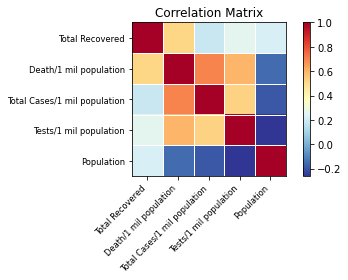

In [16]:
import statsmodels.graphics.api as smg
#"Total Cases",  "Total Tests",   "Active Cases",
smg.plot_corr(corr_matrix, xnames=[   "Total Recovered",  "Death/1 mil population", "Total Cases/1 mil population", "Tests/1 mil population", "Population"])
plt.show()

## Normalidad de los Residuos

- Jarque-Bera: Test de hipótesis que contrasta si los datos de la muestra tienen el coeficiente de simetría y la curtósis de una distribución normal.
- $\chi^2$ (p-valor): p-valor del Test de Jaque-Bera.
- Skew: Coeficiente de Simetría de pearson de los residuos.
- Kurtosis: Coeficiente de apuntamiento de los residuos.

#### Analisis de los resultados:

#### - Para que aceptemos la hipotesis de la normalidad nula (Chi-cuadrado y Jarque-Bera), nuestro p-valor debe ser mayor que alfa (0.05).
#### - Para que aceptemos la hipotesis de la simetria de skew, nuestro valor tiene que ser proximo a 0.
#### - Para que aceptemos la hipotesis de kurtosis, el valor debe ser proximo a 4.

In [17]:
mco_res = sm.OLS(Y, sm.add_constant(X)).fit()
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(mco_res.resid)
for i in range(4):
    print(name[i], test[i])

Jarque-Bera 310.2491466410718
Chi^2 two-tail prob. 4.268288823709131e-68
Skew -0.6702477064416816
Kurtosis 14.665829660435334


#### Como nuestro Chi-cuadrado es: 5.192827366266701e-71 < 0.05, no podemos aceptar la hipotesis de la normalidad nula.
#### El valor de nuestro Skew es: 1.5756829717965635,  no podemos decir que es sigue un modelo simetrico ya que es no es proximo a 0.
#### Nuestro valor de kurtosis es: 14.572525607665003, por lo que deberias rechazarlo ya que no es proximo a 4.

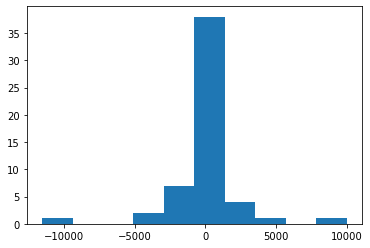

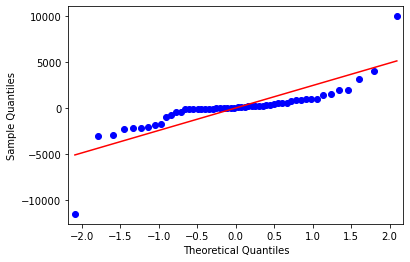

In [18]:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco1.resid)
pyplot.show()
qqplot(mco1.resid, line='s')
pyplot.show()

#### Como nuestros datos al menos la mitad de ellos se encuentran por encima de la media, no estan del todo mal.

- Komogorov-Smirnov: Test de Hipótesis para contrastar si una muestra proviene de una distribución (en este caso normal).

In [19]:
import statsmodels.stats.diagnostic as diag

diag.kstest_normal(mco1.resid)

(0.23177629481614317, 0.0009999999999998899)

#### Tambien lo del p-valor > 0.05

### Del modelo se pueden extraer otras medidas como:

* Valores predichos $\hat y$
* Residuos
  


In [20]:
mco1 = sm.OLS(Y, sm.add_constant(X)).fit()
yhat=mco1.fittedvalues
e=mco1.resid
print(e)
np.mean(e)

0      1542.925543
1       376.305318
2      -124.249774
3       174.901876
4       -64.486241
5       304.775151
6       951.440521
7      -420.700562
8         8.343657
9       149.368058
10     -444.496618
11       44.667442
12     1022.602915
13     -106.621004
14     9965.650433
15      567.285803
16      -66.427495
17    -1001.444034
18    -3065.567383
19     3168.507740
20      -29.537006
21    -2040.034667
22     -165.985254
23      175.782042
24     -726.022002
25    -1728.081874
26      150.769082
27      169.974333
28    -2954.514563
29     -169.917635
30      506.191552
31      292.366632
32       40.742601
33     1994.012227
34   -11520.077835
35    -2225.388721
36    -2162.864092
37      167.094576
38    -2260.026116
39     1359.310034
40     -137.581991
41     -146.321204
42      985.077704
43      151.376040
44      836.756393
45     3971.602021
46      -15.029774
47     1961.382204
48      909.827873
49      -34.668614
50      222.248228
51      577.818690
52    -1876.

-4.861164968503915e-11

* Suma de Cuadrados Totales (SCT)

In [21]:
mco1.centered_tss

#sum((Y-np.mean(Y))**2)

8328625895.87037

* Suma de Cuadrados Explicada (SCE)

In [22]:
mco1.ess
#print("Suma de Cuadrados Explicada (SCE): ", sum((mco1.fittedvalues-np.mean(Y))**2))

8006698550.104341

* Suma de Cuadrados de los residuos (SCR)

In [23]:
mco1.ssr
#print("Suma de Cuadrados de los residuos (SCR): ", sum(e**2))

321927345.766029

* $R^2$ y $R^2$-ajustado

In [24]:
mco1.rsquared
mco1.rsquared_adj

0.9573205173665473

* Valor $F_{exp}$ y de $F_{teo}$

In [25]:
Fexp=mco1.fvalue
from scipy import stats
alpha=0.05
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)
alpha=0.10
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)

0.05 238.76289818779563 2.408514119499335
0.1 238.76289818779563 1.971103152695809


* Valores $t_{exp}$ y $t_{teo}$

In [26]:
texp=mco1.tvalues
print("texp: ", texp)
alpha=0.05
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)
alpha=0.10
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)

texp:  const                           -0.069853
Total Recovered                 25.381767
Death/1 mil population           2.503207
Total Cases/1 mil population    -1.257029
Tests/1 mil population          -2.199014
Population                      -0.277413
dtype: float64
0.05
2.0106347546964454
0.1
1.6772241953450393


* Intervalos de confianza de Estimadores

In [27]:
mco1.conf_int()

,0,1
const,-1155.446509,1077.857320
Total Recovered,0.027114,0.031780
Death/1 mil population,0.724816,6.642082
Total Cases/1 mil population,-0.051571,0.011894
Tests/1 mil population,-0.013289,-0.000595
Population,-0.000025,0.000019


### Graficas que muestran la validez del modelo

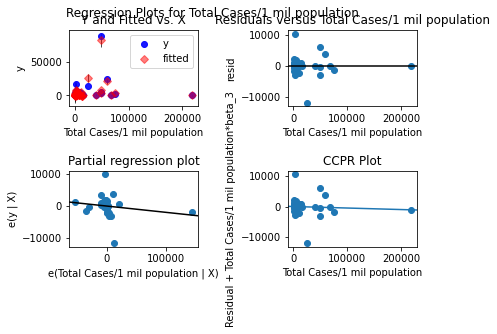

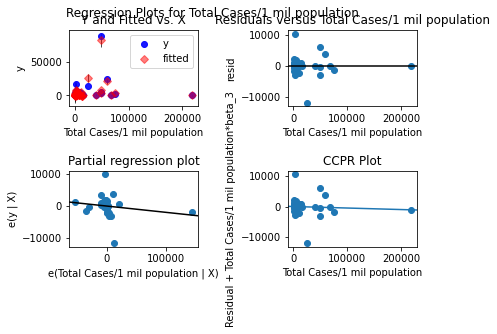

In [28]:
sm.graphics.plot_regress_exog(mcp, 3)

## Predicciones sobre las muertes por covid en un pais imaginario en Africa

In [29]:
print(results.params)

const                          -38.794594
Total Recovered                  0.029447
Death/1 mil population           3.683449
Total Cases/1 mil population    -0.019839
Tests/1 mil population          -0.006942
Population                      -0.000003
dtype: float64


### Algeria


#### "Total Recovered": 140238
#### "Death/1 mil population": 130
#### "Total Cases/1 mil population": 4561
#### "Tests/1 mil population": 5147
#### "Population": 44857594

In [30]:
muertos = results.params[0] + results.params[1]*140238 + results.params[2]*130 + results.params[3]*4561 + results.params[4]*5147 + results.params[5]*44857594;
print("Resultado --> ", muertos)
print("Resultado esperado --> 5853")
print("Porcentaje de acierto --> ", ((min(muertos,5853)/ max(muertos,5853))*100), "%")

Resultado -->  4310.074457255606
Resultado esperado --> 5853
Porcentaje de acierto -->  73.6387230011209 %


### Tunez

#### "Total Recovered": 682353
#### "Death/1 mil population": 2090
#### "Total Cases/1 mil population": 59271
#### "Tests/1 mil population": 250004
#### "Population": 11975999


In [31]:
muertos = results.params[0] + results.params[1]*682353 + results.params[2]*2090 + results.params[3]*59271 + results.params[4]*250004 + results.params[5]*11975999;
print("Resultado --> ", muertos)
print("Resultado esperado --> 25028")
print("Porcentaje de acierto --> ", ((min(muertos,25028)/ max(muertos,25028))*100), "%")

Resultado -->  24805.751772186853
Resultado esperado --> 25028
Porcentaje de acierto -->  99.11200164690288 %


### Marruecos

#### "Total Recovered": 917807
#### "Death/1 mil population": 386
#### "Total Cases/1 mil population": 25067
#### "Tests/1 mil population": 262717
#### "Population": 37467214

In [32]:
muertos = results.params[0] + results.params[1]*917807 + results.params[2]*386 + results.params[3]*25067 + results.params[4]*262717 + results.params[5]*37467214;
print("Resultado --> ", muertos)
print("Resultado esperado --> 14457")
print("Porcentaje de acierto --> ", ((min(muertos,14457)/ max(muertos,14457))*100), "%")

Resultado -->  25977.07783518474
Resultado esperado --> 14457
Porcentaje de acierto -->  55.65291096914168 %


#### Este resultado no tiene sentido, hemos llegado a la conclusion de que se han reducido el numero de muertes o que hay escasez de información respectos a nuestra prediccion.

### Sudáfrica

#### "Total Recovered": 2791256
#### "Death/1 mil population": 1466
#### "Total Cases/1 mil population": 48326
#### "Tests/1 mil population": 298413
#### "Population": 11360709

In [33]:
muertos = results.params[0] + results.params[1]*2791256 + results.params[2]*1466 + results.params[3]*48326 + results.params[4]*298413 + results.params[5]*11360709;
print("Resultado --> ", muertos)
print("Resultado esperado --> 88317")
print("Porcentaje de acierto --> ", ((min(muertos,88317)/ max(muertos,88317))*100), "%")

Resultado -->  84490.74274679863
Resultado esperado --> 88317
Porcentaje de acierto -->  95.66758692754354 %


## Conclusion

### Es muy complicado estimar datos sobre el covid, porque segun nosotros y nuestro modelo, en Marruecos, por ejemplo, deberian de haber muerto por lo menos 27000 personas y no el resultado tan reducido que muestran en este pais, creemos que es por la falta de información y de comunicación, buscandose numeros bajos para tranquilizar tanto a la poblacion como al beneficio internacional.

### Sin embargo en paises que en nuestra opinion creemos que estan mas desarrollados, como son Sudáfrica y Tunez, obtenemos unos datos bastante precisos, con un porcentaje de acierto de mas del 90%, demostrando asi la fiabilidad de nuestro modelo.